Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_sobelx.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

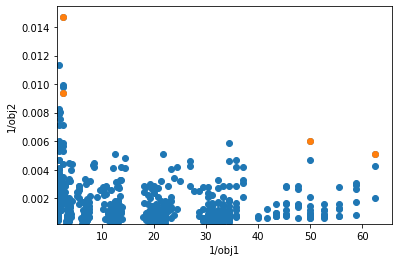

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


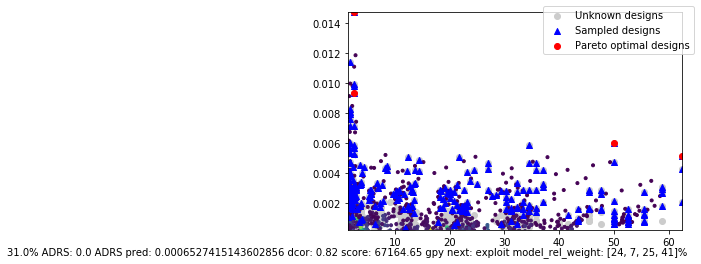

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([506, 502, 509, 259, 355, 580, 718, 628, 389, 395,   5, 197,   4,
         3,  10,   0, 390, 575,   6,  11,  16, 196,   1,  42,   9, 192,
       144,  48, 384, 240,  51,  96, 723, 581, 288, 623, 432,  57, 480,
        12, 336, 576, 150,  15,  22,  58,  52,  59, 426, 198,  54,  49,
       246, 438, 676,   2,  53, 102, 100,  17, 194, 195,  50,  65,  47,
       193,  98, 107, 202, 394, 388, 431, 387, 578, 579, 294, 101, 245,
        64, 385, 155, 203, 437,  24, 436, 629, 243, 244, 190, 386, 577,
       435, 586, 585, 434, 444, 186, 201, 106, 293, 433, 627, 242, 207,
       625, 209, 634, 592, 591, 633, 214, 204, 393, 584,  46, 486, 145,
       241,  99, 485, 632, 675, 626, 292, 291,  19,   7, 399,  13,  23,
       724,  29, 391,  35, 624, 199,   8, 148,  14, 149, 340, 341, 532,
       206, 154, 531,  60, 342, 215, 200, 147, 339, 337,  18, 392, 583,
       146, 114, 108, 338, 290,  56, 587, 530, 529, 484, 252, 482, 208,
       483, 528, 582, 249,  55, 152, 401, 221,  28, 622, 220,  4